In [84]:
import tensorflow as tf
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [86]:
TRAIN_PATH = 'D:/Desktop/asseco/kwiaty/images/train'
TEST_PATH = 'D:/Desktop/asseco/kwiaty/images/test'
width =  150
height = 100

In [87]:
def read_files(folder):

    images = []
    
    for file in sorted(os.listdir(folder), key = len):
        
            img_array = cv.imread(os.path.join(folder, file))
            img_rgb = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            img_array_resized = cv.resize(img_rgb, (width,height))
            images.append(img_array_resized)
    
    return images

In [88]:
train_img = read_files(TRAIN_PATH)

In [89]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [90]:
len(train)

1821

In [91]:
train[['healthy', 'multiple_diseases', 'rust', 'scab']].value_counts()

healthy  multiple_diseases  rust  scab
0        0                  1     0       622
                            0     1       592
1        0                  0     0       516
0        1                  0     0        91
dtype: int64

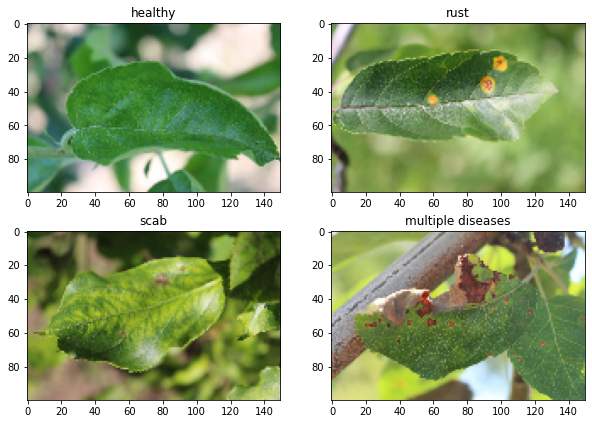

In [165]:
rows = 2
columns = 2

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(rows, columns, 1)

plt.imshow(train_img[2])
plt.title('healthy')

fig.add_subplot(rows, columns, 2)

plt.imshow(train_img[3])
plt.title('rust')

fig.add_subplot(rows, columns, 3)

plt.imshow(train_img[0])
plt.title('scab')

fig.add_subplot(rows, columns, 4)

plt.imshow(train_img[1])
plt.title('multiple diseases')

plt.show()

In [93]:
train_labels = train[['healthy', 'multiple_diseases', 'rust', 'scab']].to_numpy()
train_labels

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [94]:
X = np.array(train_img)/255
y = np.array(train_labels)
y = np.argmax(y, axis=1)

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
X_val.shape

(183, 100, 150, 3)

In [97]:
X_train.shape

(1638, 100, 150, 3)

In [121]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, 5, padding = 'same', activation = 'relu', input_shape = [width, height, 3]))
model.add(MaxPool2D(2))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2))

model.add(Flatten()) 

model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
gen = ImageDataGenerator(
        rotation_range = 10,  
        zoom_range = 0.10,  
        width_shift_range = 0.1, 
        height_shift_range = 0.1,
        horizontal_flip = True,
        vertical_flip = True)

In [123]:
batches = gen.flow(X_train, y_train, batch_size=128)
val_batches=gen.flow(X_val, y_val, batch_size=128)

In [124]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

In [125]:
history=model.fit_generator(generator=batches, epochs=100, 
                    validation_data=val_batches, callbacks=[monitor], verbose=2)

Epoch 1/100
13/13 - 29s - loss: 1.3384 - accuracy: 0.3284 - val_loss: 1.2404 - val_accuracy: 0.2787
Epoch 2/100
13/13 - 23s - loss: 1.2491 - accuracy: 0.3095 - val_loss: 1.2193 - val_accuracy: 0.3443
Epoch 3/100
13/13 - 23s - loss: 1.2238 - accuracy: 0.3822 - val_loss: 1.2282 - val_accuracy: 0.3880
Epoch 4/100
13/13 - 23s - loss: 1.2093 - accuracy: 0.3999 - val_loss: 1.1743 - val_accuracy: 0.3934
Epoch 5/100
13/13 - 22s - loss: 1.1968 - accuracy: 0.4078 - val_loss: 1.1874 - val_accuracy: 0.3825
Epoch 6/100
13/13 - 22s - loss: 1.1781 - accuracy: 0.4377 - val_loss: 1.1608 - val_accuracy: 0.4153
Epoch 7/100
13/13 - 23s - loss: 1.1626 - accuracy: 0.4591 - val_loss: 1.1898 - val_accuracy: 0.4098
Epoch 8/100
13/13 - 23s - loss: 1.1758 - accuracy: 0.4457 - val_loss: 1.1511 - val_accuracy: 0.4317
Epoch 9/100
13/13 - 23s - loss: 1.1657 - accuracy: 0.4542 - val_loss: 1.1989 - val_accuracy: 0.3661
Epoch 10/100
13/13 - 22s - loss: 1.1686 - accuracy: 0.4408 - val_loss: 1.1704 - val_accuracy: 0.4481

Epoch 83/100
13/13 - 23s - loss: 0.1980 - accuracy: 0.9322 - val_loss: 0.3996 - val_accuracy: 0.8579
Epoch 84/100
13/13 - 23s - loss: 0.2292 - accuracy: 0.9206 - val_loss: 0.2838 - val_accuracy: 0.9235
Epoch 85/100
13/13 - 23s - loss: 0.1809 - accuracy: 0.9359 - val_loss: 0.3860 - val_accuracy: 0.8907
Epoch 86/100
13/13 - 23s - loss: 0.1771 - accuracy: 0.9420 - val_loss: 0.3241 - val_accuracy: 0.9071
Epoch 87/100
13/13 - 23s - loss: 0.1463 - accuracy: 0.9457 - val_loss: 0.2502 - val_accuracy: 0.9235
Epoch 88/100
13/13 - 25s - loss: 0.1491 - accuracy: 0.9426 - val_loss: 0.3845 - val_accuracy: 0.8743
Epoch 89/100
13/13 - 23s - loss: 0.1676 - accuracy: 0.9359 - val_loss: 0.4484 - val_accuracy: 0.8962
Epoch 90/100
13/13 - 23s - loss: 0.1863 - accuracy: 0.9310 - val_loss: 0.4796 - val_accuracy: 0.8634
Epoch 91/100
13/13 - 23s - loss: 0.1886 - accuracy: 0.9292 - val_loss: 0.4288 - val_accuracy: 0.8470
Epoch 92/100
13/13 - 23s - loss: 0.2242 - accuracy: 0.9219 - val_loss: 0.2977 - val_accurac

In [171]:
print('Uzyskana dokładność: ', max(history.history['val_accuracy']))

Uzyskana dokładność:  0.9234972596168518


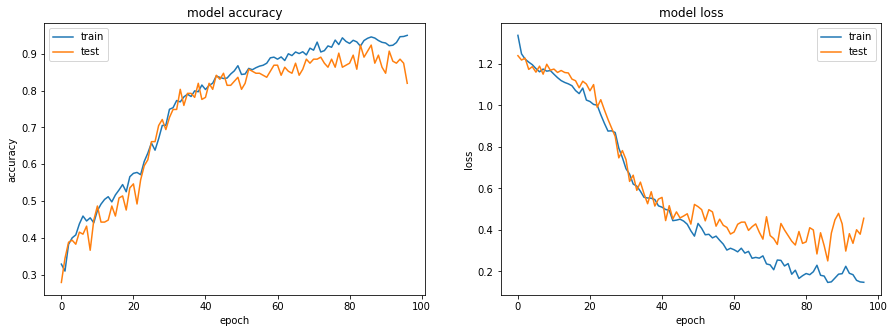

In [175]:
fig = plt.figure(figsize=(15, 5))

fig.add_subplot(1, 2, 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

fig.add_subplot(1, 2, 2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [133]:
sub = pd.read_csv('sample_submission.csv')

In [135]:
test_img = read_files(TEST_PATH)

In [136]:
X_test = np.array(test_img)/255

In [137]:
test_predict = model.predict(X_test)
sub.loc[:, 'healthy':] = test_predict
sub.to_csv('sample_submission.csv', index=False)

In [159]:
sub['prediction'] = sub[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)

In [160]:
sub.head()

,image_id,healthy,multiple_diseases,rust,scab,prediction
0,Test_0,2.005079e-08,0.003196,0.996804,1.163895e-09,rust
1,Test_1,1.544367e-08,0.000452,0.999548,2.176528e-08,rust
2,Test_2,4.599502e-03,0.006899,0.000056,9.884454e-01,scab
3,Test_3,9.951343e-01,0.000018,0.001638,3.210045e-03,healthy
4,Test_4,1.048456e-16,0.003365,0.996635,1.162955e-16,rust


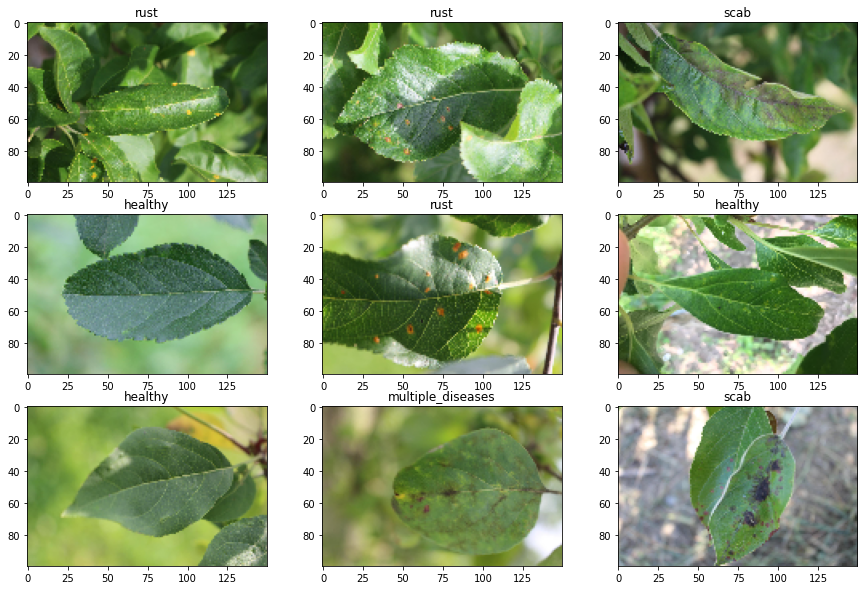

In [177]:
rows = 3
columns = 3

fig = plt.figure(figsize=(15, 10))

for i in range(9):

    fig.add_subplot(rows, columns, i+1)

    plt.imshow(test_img[i])
    plt.title(sub['prediction'][i])